<a href="https://colab.research.google.com/github/jarinari/Algorithmic-Trading-Plugins/blob/master/ponencia_robotrader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ENTORNO

##LIBRERÍAS

In [ ]:
#INSTALACIÓN
!pip install pandas_ta
!pip install wittgenstein

In [ ]:
#IMPORTACIÓN
import requests
import pandas as pd
import pandas_ta as ta
import numpy as np
import re
from scipy.stats import ks_2samp
import wittgenstein as lw
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

##FUNCIONES

In [ ]:
#FUNCIÓN PARA OBTENER DATOS HISTÓRICOS

def data(ticker):

  #Escoger url en función del ticker
  if ticker=='EURUSD':
    url = 'https://drive.google.com/uc?id=1LlY2GBrcT_-sJqthhj6uC-IwSEY9a8WT'
  if ticker=='USDJPY':
    url = 'https://drive.google.com/uc?id=1AsvEXoABA5t1ZYgweIN3CRdjCZS9m71a'
  if ticker=='GBPUSD':
    url = 'https://drive.google.com/uc?id=1KBCnNVliSYr-ar0bu-qx_wGaMgrabm3O'
  if ticker=='USDCHF':
    url = 'https://drive.google.com/uc?id=1FFIIlUyModE_IFYKzW2xQE5UtqIM8RTo'
  if ticker=='USDCAD':
    url = 'https://drive.google.com/uc?id=1ykN2iwvz2rH4J6uGmsOEKiA6qgW2vO-J'
  if ticker=='NZDUSD':
    url = 'https://drive.google.com/uc?id=1RONw-Nq1ogacsZ7HEU6LFI78VqmBCE4z'
  if ticker=='AUDUSD':
    url = 'https://drive.google.com/uc?id=13fUZIicqMg5dogMPgMNQZBw3Z-rh9vYl'
  if ticker=='EURGBP':
    url = 'https://drive.google.com/uc?id=1P-2TGd2VCrAnD_lC669Yh6Fo_45b0Ch2'
  if ticker=='EURCHF':
    url = 'https://drive.google.com/uc?id=1IdnlU7Z6MZX44GitFi4iTvHcEyj9NpTX'
  if ticker=='EURCAD':
    url = 'https://drive.google.com/uc?id=1oRH1Ah-0gKJrfPrHKogEL_yxJrXPJ8pR'
  if ticker=='EURAUD':
    url = 'https://drive.google.com/uc?id=1Mso1qVq3abHL7Xx5cevGSJEYPz38FFH3'
  if ticker=='EURNZD':
    url = 'https://drive.google.com/uc?id=1W3rqqoZjq5cGhEaus0CH0h4eSKVSF5X3'
  if ticker=='EURJPY':
    url = 'https://drive.google.com/uc?id=1zJgxtsfAzcWKU5P74rzEdJ2Bpgqdq3Ca'
  if ticker=='CHFJPY':
    url = 'https://drive.google.com/uc?id=1rLTTL6JJZoHIZHmUdB4UzV3TmfVOAfKh'
  if ticker=='AUDJPY':
    url = 'https://drive.google.com/uc?id=1DfvdGUejcPArwZr7WLtfrK_5ZYnwEHqE'
  if ticker=='GBPJPY':
    url = 'https://drive.google.com/uc?id=1FnPI1a9ZslBFVDVSvq2mMa2bJ6p4Tj2z'
  if ticker=='CADJPY':
    url = 'https://drive.google.com/uc?id=16xSlSKN-2ePTPxj-korZ7VAb5ssgdvNq'
  if ticker=='NZDJPY':
    url = 'https://drive.google.com/uc?id=1os5THEr_i2AxcYNXiH10ij8FyfSC1YBJ'
  if ticker=='GBPAUD':
    url = 'https://drive.google.com/uc?id=1x0ElIT1hWt95ffYXLUbc-OSChPpHQoLh'
  if ticker=='GBPCHF':
    url = 'https://drive.google.com/uc?id=17cn5T1m_N1itJn8wuPAQ6pi4Jz_wMDqH'
  if ticker=='GBPCAD':
    url = 'https://drive.google.com/uc?id=1XOVer2i0Mn3h6Xeq4cMsKwhZsdLu_yAn'
  if ticker=='GBPNZD':
    url = 'https://drive.google.com/uc?id=1tcyV16_eo49yIUlzJ_KT8QtUdZ2wkxv-'
  if ticker=='CADCHF':
    url = 'https://drive.google.com/uc?id=1rbw0_6s328QhpEWtULFsZL1t53o3FK0W'
  if ticker=='AUDCAD':
    url = 'https://drive.google.com/uc?id=1Z-8wPY63cKnD9HD9W3vBT_icH-joxBLX'
  if ticker=='NZDCAD':
    url = 'https://drive.google.com/uc?id=1YGqias22w_zTQ8tcySncnJJDXI-t85Z6'
  if ticker=='AUDCHF':
    url = 'https://drive.google.com/uc?id=1ZD5WJ_bUCv85fV_SQFEP7TOu_Sl1H8Nu'
  if ticker=='NZDCHF':
    url = 'https://drive.google.com/uc?id=1SHWE1-LshbqmyVDzVe3Nyhu3OPXw2bMT'

  #Extraer datos de la url
  output = "archivo.csv"
  response = requests.get(url)
  with open(output, 'wb') as f:
    f.write(response.content)
  data = pd.read_csv(output)

  #Formatear datos
  data.columns = ["Date", "Time", "Open", "High", "Low", "Close", "Volume"]
  data = data.set_index("Date")
  data = data.drop(["Time", "Volume"], axis=1)

  return data

In [ ]:
#FUNCIÓN PARA CALCULAR INDICADORES TÉCNICOS

def indicators(data):

  #Extraer columnas necesarias para el cálculo de indicadores
  close = data["Close"]
  high = data["High"]
  low = data["Low"]

  #Crear de listas para guardar el nombre de los indicadores y los valores
  indicators = []
  columns = []

  #Establecer rango de valores usados como parámetro para el cálculo de los indicadores
  periods = np.arange(2,100)

  #CCI - Commodity Channel Index
  for n in periods:
    name = "CCI" + str(n)
    indicators.append(ta.cci(high, low, close, n))
    columns.append(name)
  #NORMALIZED AVERANGE TRUE RANGE
  for n in periods:
    name = "NATR" + str(n)
    indicators.append(ta.natr(high, low, close, n))
    columns.append(name)
  #RSI - Relative Strength Index
  for n in periods:
    name = "RSI" + str(n)
    indicators.append(ta.rsi(close, n))
    columns.append(name)
  #WILLR - Williams' %R
  for n in periods:
    name = "WILLR" + str(n)
    indicators.append(ta.willr(high, low, close, n))
    columns.append(name)
  #ADX
  for n in periods:
    adx = ta.adx(high, low, close, n)
    name = "ADX" + str(n)
    indicators.append(adx["ADX_"+str(n)])
    columns.append(name)
    name = "DMP" + str(n)
    indicators.append(adx["DMP_"+str(n)])
    columns.append(name)
    name = "DMN" + str(n)
    indicators.append(adx["DMN_"+str(n)])
    columns.append(name)
  #MOMENTUM
  for n in periods:
    name = "MOM" + str(n)
    indicators.append(ta.mom(close, n))
    columns.append(name)

  #Crear dataframe con todos los indicadores calculados
  df = pd.concat(indicators, axis=1)
  df.columns = columns
  df.index = data.index
  df["Open"] = data["Open"]
  df['High'] = data['High']
  df['Low'] = data['Low']
  df['Close'] = data['Close']

  #Eliminar las filas con valores faltantes
  df = df.dropna()

  return df

In [ ]:
#FUNCIONES PARA CALCULAR RETORNOS EN PIPS

def returns(data):

  #Calcular retorno a un día vista
  data['Return'] = (data['Open'].shift(-2) - data['Open'].shift(-1))

  return data

def returns_pips(ticker):

  #Calcular retorno en pips en función del ticker
  if 'JPY' in ticker:
    mult = 100
  else:
    mult = 10000

  return mult

In [ ]:
#FUNCIÓN PARA EL ETIQUETADO

def labeling(data):

  #Etiquetar como 1 si el retorno es superior a 10 pips
  data['Label'] = np.where(data['Return'] > 0, 1, 0)

  return data

In [ ]:
#FUNCIÓN PARA GENERAR DATASET

def dataset(ticker):
  df = data(ticker)
  df = df.loc["2011.01.01":"2022.07.01", :]
  df = indicators(df)
  df = returns(df)
  df['Return'] = df['Return'] * returns_pips(ticker)
  df = labeling(df)
  df = df.drop(['Open', 'High', 'Low', 'Close'], axis=1)
  df = df.loc["2012.01.01":"2022.07.01", :]
  df = df.dropna()
  return df

In [ ]:
#FUNCIÓN PARA FILTRAR REGLAS EN FUNCIÓN DE LOS INDICADORES

def extract_letters(string):
  return re.findall('[a-zA-Z]+', string)

##DATASET

In [ ]:
#GENERACIÓN DEL DATASET

df = dataset('EURUSD') #Cualquier cruce de majors

#GIGO

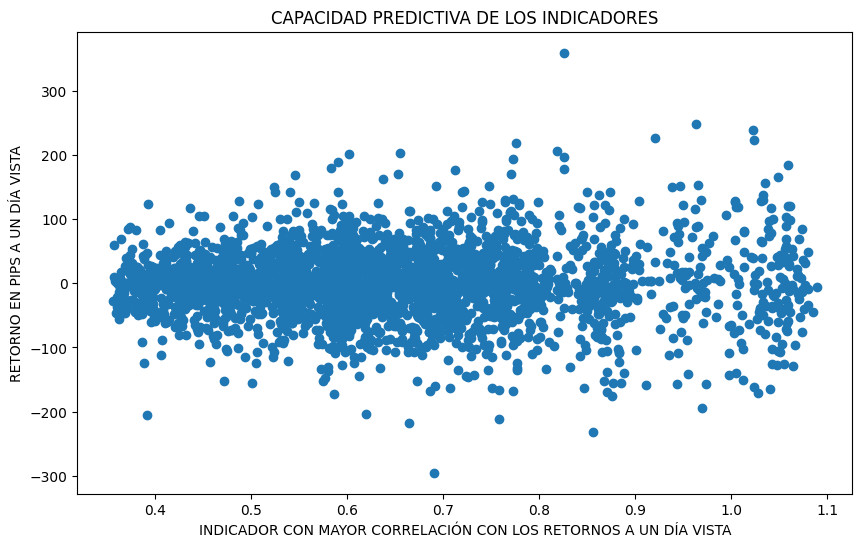

In [ ]:
#CÁLCULO DE CORRELACIONES DE CADA INDICADOR RESPECTO AL RETORNO A UN DÍA VISTA

column_list = []
cor_list = []
for column in df.iloc[:,:-2]:
  cor = df[column].corr(df['Return'])
  column_list.append(column)
  cor_list.append(cor)
correlations = pd.DataFrame({'Correlation': cor_list})
correlations.index = column_list
correlations = correlations.sort_values('Correlation', ascending=False)


#GRÁFICO DEL RETORNO A UN DÍA VISTA RESPECTO AL INDICADOR CON MAYOR CORRELACIÓN

plt.figure(figsize=(10, 6))
plt.scatter(df[correlations.index[0]], df['Return'])
plt.ylabel('RETORNO EN PIPS A UN DÍA VISTA')
plt.xlabel('INDICADOR CON MAYOR CORRELACIÓN CON LOS RETORNOS A UN DÍA VISTA')
plt.title('CAPACIDAD PREDICTIVA DE LOS INDICADORES')
plt.show()

#DRIFT

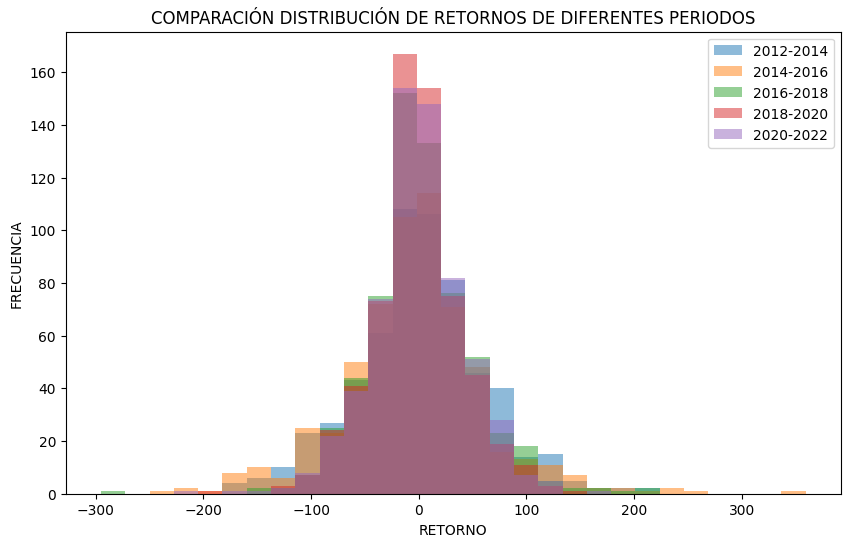

In [ ]:
#GRÁFICO DE LAS DISTRIBUCIÓN DE RETORNOS DE DISTINTOS PERIODOS

bins = np.linspace(min(df['Return']), max(df['Return']), 30)
plt.figure(figsize=(10, 6))
plt.hist(df.loc['2012.01.01':'2014.01.01']['Return'], bins=bins, alpha=0.5, label='2012-2014')
plt.hist(df.loc['2014.01.01':'2016.01.01']['Return'], bins=bins, alpha=0.5, label='2014-2016')
plt.hist(df.loc['2016.01.01':'2018.01.01']['Return'], bins=bins, alpha=0.5, label='2016-2018')
plt.hist(df.loc['2018.01.01':'2020.01.01']['Return'], bins=bins, alpha=0.5, label='2018-2020')
plt.hist(df.loc['2020.01.01':'2022.01.01']['Return'], bins=bins, alpha=0.5, label='2020-2022')
plt.xlabel('RETORNO')
plt.ylabel('FRECUENCIA')
plt.title('COMPARACIÓN DISTRIBUCIÓN DE RETORNOS DE DIFERENTES PERIODOS')
plt.legend(loc='upper right')
plt.show()

#OVERFITTING

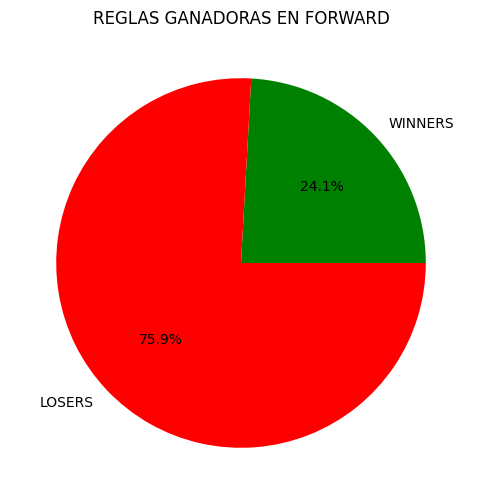

In [ ]:
#PARTICIÓN

train = df.loc['2012.01.01':'2019.01.01', :]
test = df.loc['2019.01.01':'2022.01.01', :]
forward = df.loc['2022.01.01':'2022.07.01', :]

#FEATURES Y TARGET

X = train.iloc[:,:-2]
Y = train['Label']

#MINADO DE REGLAS CON MÉTRICAS DE BACKTEST

#Generar listas de métricas correspondientes a cada regla minada
rule_list = [] #Regla
n_list = [] #Número de operaciones
profit_list = [] #Beneficio
sharpe_list = [] #Sharpe
sqn_list = [] #SQN
pf_list = [] #Profit Factor
dd_list = [] #Máximo DrawDown
rf_list = [] #Recovery Factor
forward_profit_list = [] #Beneficio en forward

#Minar reglas
for n in range(1000):
  ripper_clf = lw.RIPPER(max_rules=1)
  ripper_clf.fit(X.sample(10, axis=1), Y, pos_class=1)
  rule = str(ripper_clf.ruleset_[0])
  test['Pred'] = ripper_clf.predict(test)
  trades = test[test['Pred']==True]['Return']

  #Calcular métricas de backtest
  n_trades = len(trades)
  profit = np.sum(trades)
  sharpe = np.mean(trades)/np.std(trades)
  sqn = sharpe*n_trades**0.5
  pf = np.sum(trades[trades>0])/abs(np.sum(trades[trades<0]))
  dd = (trades.cumsum()-trades.cumsum().cummax()).min()
  rf = profit/abs(dd)

  #Guardar métricas de backtest
  rule_list.append(rule)
  n_list.append(n_trades)
  profit_list.append(profit)
  sharpe_list.append(sharpe)
  sqn_list.append(sqn)
  pf_list.append(pf)
  dd_list.append(dd)
  rf_list.append(rf)

  #Calcular beneficio en forward
  forward['Pred'] = ripper_clf.predict(forward)
  forward_trades = forward[forward['Pred']==True]['Return']
  forward_profit_list.append(np.sum(forward_trades))

#OBTENCIÓN DEL DATAFRAME CON LAS MÉTRICAS DE CADA REGLA

overfitting = pd.DataFrame({'N': n_list,
                            'Profit': profit_list,
                            'Sharpe': sharpe_list,
                            'SQN': sqn_list,
                            'PF': pf_list,
                            'DD': dd_list,
                            'RF': rf_list,
                            'FORWARD': forward_profit_list})
overfitting.index = rule_list

#GRÁFICO DE PORCENTAJE DE REGLAS GANADORAS Y PERDEDORAS EN FORWARD

winners = sum(1 for i in overfitting['FORWARD'] if i > 0)
losers = sum(1 for i in overfitting['FORWARD'] if i < 0)
plt.figure(figsize=(10, 6))
plt.pie([winners, losers],
        labels=['WINNERS', 'LOSERS'],
        autopct='%1.1f%%',
        colors=['green', 'red'])
plt.title('REGLAS GANADORAS EN FORWARD')
plt.show()

#CAPACIDAD PREDICTIVA DE LAS MÉTRICAS

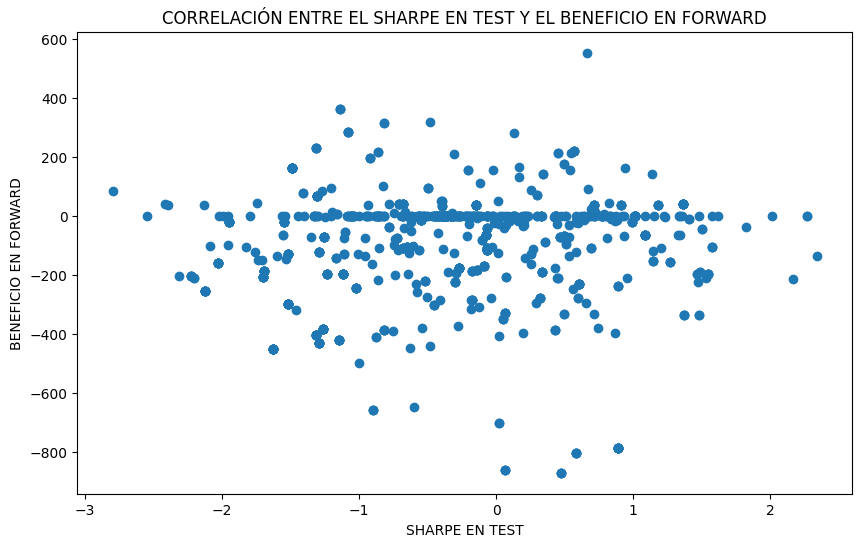

In [ ]:
#ELIMINACIÓN DE OUTLIERS

# alcular el IQR
Q1 = overfitting.quantile(0.05)
Q3 = overfitting.quantile(0.95)
IQR = Q3 - Q1

#Definir un umbral para los outliers
umbral = 1.5

#Filtrar los outliers
overfitting_filtrado = overfitting[~((overfitting < (Q1 - umbral * IQR)) | (overfitting > (Q3 + umbral * IQR))).any(axis=1)]

#GRÁFICO DE LA CORRELACIÓN ENTRE EL SHARPE EN TEST Y EL BENEFICIO EN FORWARD

plt.figure(figsize=(10, 6))
plt.scatter(overfitting_filtrado['SQN'], overfitting_filtrado['FORWARD'])
plt.title('CORRELACIÓN ENTRE EL SHARPE EN TEST Y EL BENEFICIO EN FORWARD')
plt.xlabel('SHARPE EN TEST')
plt.ylabel('BENEFICIO EN FORWARD')
plt.show()


#VIGENCIA

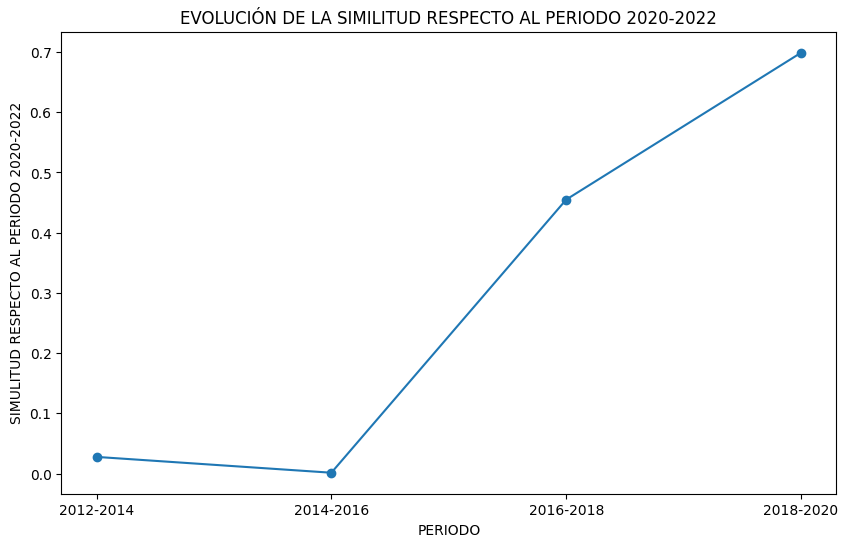

In [ ]:
#CÁLCULO DE LA SIMILITUD ENTRE LA DISTRIBUCIÓN DE RETORNOS DE DISTINTOS PERIODOS RESPECTO AL PERIODO 2020-2022

# Obtener los retornos para cada periodo
returns_2012_2014 = df.loc['2012.01.01':'2014.01.01']['Return']
returns_2014_2016 = df.loc['2014.01.01':'2016.01.01']['Return']
returns_2016_2018 = df.loc['2016.01.01':'2018.01.01']['Return']
returns_2018_2020 = df.loc['2018.01.01':'2020.01.01']['Return']
returns_2020_2022 = df.loc['2020.01.01':'2022.01.01']['Return']

# Calcular el valor p de la prueba de Kolmogorov-Smirnov
_, pvalue_2012_2014 = ks_2samp(returns_2012_2014, returns_2020_2022)
_, pvalue_2014_2016 = ks_2samp(returns_2014_2016, returns_2020_2022)
_, pvalue_2016_2018 = ks_2samp(returns_2016_2018, returns_2020_2022)
_, pvalue_2018_2020 = ks_2samp(returns_2018_2020, returns_2020_2022)

#GRÁFICO DE LA EVOLUCIÓN DE LA SIMILITUD DE LA DISTRIBUCIÓN DE DISTINTOS PERIODOS RESPECTO AL PERIODO 2020-2022

# Definir los periodos
periods = ['2012-2014', '2014-2016', '2016-2018', '2018-2020']

# Definir los valores p
pvalues = [pvalue_2012_2014, pvalue_2014_2016, pvalue_2016_2018, pvalue_2018_2020]

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(periods, pvalues, marker='o')
plt.xlabel('PERIODO')
plt.ylabel('SIMULITUD RESPECTO AL PERIODO 2020-2022')
plt.title('EVOLUCIÓN DE LA SIMILITUD RESPECTO AL PERIODO 2020-2022')
plt.show()

#PARTICIÓN INVERSA

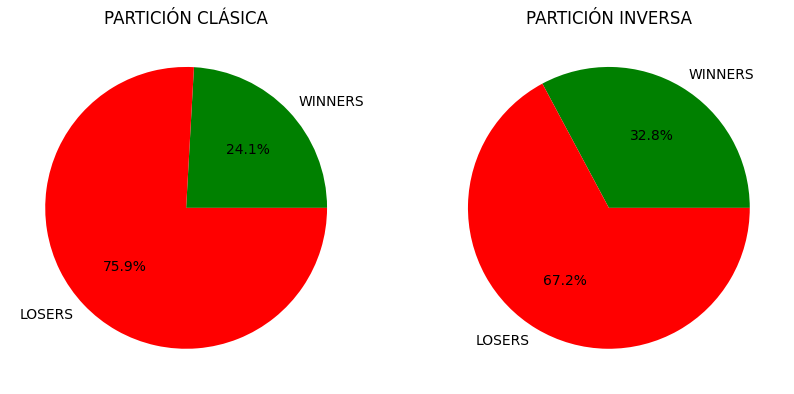

In [ ]:
#PARTICIÓN INVERSA

train = df.loc['2019.01.01':'2022.01.01', :]
forward = df.loc['2022.01.01':'2022.07.01', :]

#FEATURES Y TARGET

X = train.iloc[:,:-2]
Y = train['Label']

#MINADO DE REGLAS CON MÉTRICAS DE BACKTEST

#Generar listas de métricas correspondientes a cada regla minada
rule_list = [] #Regla
forward_profit_list = [] #Beneficio en forward

#Minar reglas
for n in range(1000):
  ripper_clf = lw.RIPPER(max_rules=1)
  ripper_clf.fit(X.sample(10, axis=1), Y, pos_class=1)
  rule = str(ripper_clf.ruleset_[0])
  rule_list.append(rule)

  #Calcular beneficio en forward
  forward['Pred'] = ripper_clf.predict(forward)
  forward_trades = forward[forward['Pred']==True]['Return']
  forward_profit_list.append(np.sum(forward_trades))

#OBTENCIÓN DEL DATAFRAME CON LAS MÉTRICAS DE CADA REGLA

overfitting_pi = pd.DataFrame({'FORWARD': forward_profit_list})
overfitting_pi.index = rule_list

#GRÁFICO DE LOS RESULTADOS DE LA PARTICIÓN CLÁSICA vs PARTICIÓN INVERSA

winners_pi = sum(1 for i in overfitting_pi['FORWARD'] if i > 0)
losers_pi = sum(1 for i in overfitting_pi['FORWARD'] if i < 0)
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.pie([winners, losers],
        labels=['WINNERS', 'LOSERS'],
        autopct='%1.1f%%',
        colors=['green', 'red'])
plt.title('PARTICIÓN CLÁSICA')
plt.subplot(1, 2, 2)
plt.pie([winners_pi, losers_pi],
        labels=['WINNERS', 'LOSERS'],
        autopct='%1.1f%%',
        colors=['green', 'red'])
plt.title('PARTICIÓN INVERSA')
plt.show()

#RANDOM TEST

In [ ]:
test = df.loc['2012.01.01':'2019.01.01', :]

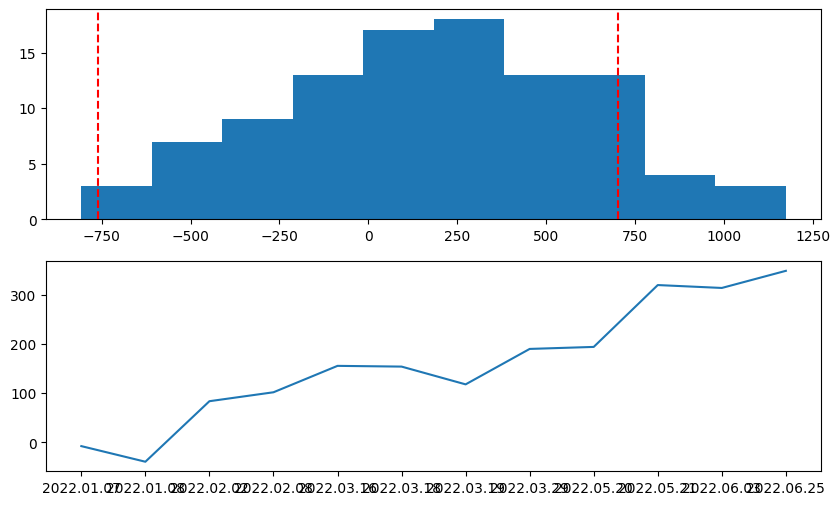

In [ ]:
ripper_clf = lw.RIPPER(max_rules=1)
ripper_clf.fit(X.sample(10, axis=1), Y, pos_class=1)
rule = str(ripper_clf.ruleset_[0])
test = df.loc['2012.01.01':'2019.01.01', :]
test['Pred'] = ripper_clf.predict(test)
profits = np.zeros(100)
for n in range(100):
  bt = test.sample(int(len(train)))
  trades = bt[bt['Pred']==True]['Return']
  profit = trades.sum() if len(trades) > 0 else 0
  profits[n] = profit

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.hist(profits)
plt.axvline(x=np.mean(test['Return'])*40 + 2 * np.std(test['Return'])*40**0.5, color='r', linestyle='--')
plt.axvline(x=np.mean(test['Return'])*40 - 2 * np.std(test['Return'])*40**0.5, color='r', linestyle='--')
plt.subplot(2, 1, 2)
forward_bt = forward.copy()
forward_bt['pred'] = ripper_clf.predict(forward_bt)
plt.plot(forward_bt[forward_bt['pred']==True]['Return'].cumsum())
plt.show()